# (Ford gobike 2019feb tripdata)
## by (Mostafa Mohamed Azazi)

## Preliminary Wrangling

> This data set is taken from https://www.fordgobike.com/system-data and represents trips taken by members of the service for month of February of 2019.
>Data consists of info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

### What is the structure of your dataset?

> Dataset has 183412 entries(trips) of total 16 columns (duration_sec,start_time,end_time,start_station_id,start_station_name, start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,
end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip)


### What is/are the main feature(s) of interest in your dataset?

>  features affects the duration of rides and number of rides.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think  (age , gender, user_type) will support my invertigation

### Cleaning Data


In [7]:
#Convert time from object to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [8]:
#eleminate null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

In [11]:
df.shape

(174952, 16)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### which gender takes trips most?

In [12]:
base_color = sb.color_palette()[0]

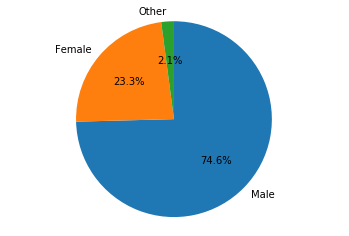

In [13]:
sorted_gender = df['member_gender'].value_counts()
plt.pie(sorted_gender, labels = sorted_gender.index, startangle = 90, counterclock = False,autopct='%1.1f%%');
plt.axis('equal');

> Male rent bikes more with 75%

### which age takes trips most?

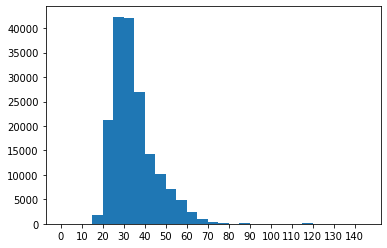

In [14]:
df['age'] = 2019 - df.member_birth_year
bins = np.arange(0, df['age'].max()+5, 5)
plt.hist(df['age'],bins = bins);
plt.xticks(np.arange(0, df['age'].max(),10));

In [15]:
df['age'].max()

141.0

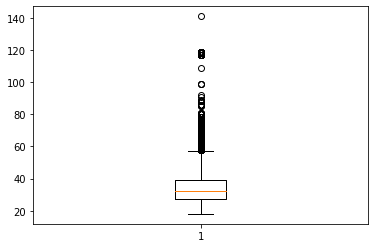

In [16]:
plt.boxplot(df['age']);

> the majority of bike hires are at the age of (25 to 35) <br>
> there are outliers and unusual points at ages heigher than 100 

### which type uses the most?

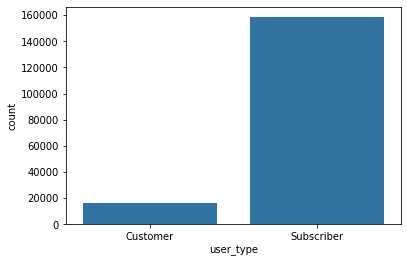

In [17]:
sb.countplot(data = df, x = 'user_type' , color = base_color);

> Subscribers use more bikes than costumers 

### In which day do people like to rent bikes?

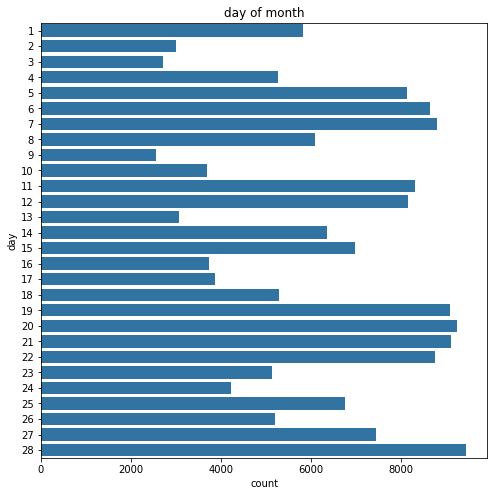

In [18]:

start_time_day = df['start_time'].dt.day.astype(int)
plt.figure(figsize = (8,8))
sb.countplot(y = start_time_day, color = base_color)
plt.title('day of month');
plt.ylabel ('day');

### Does the day of week have an effect?

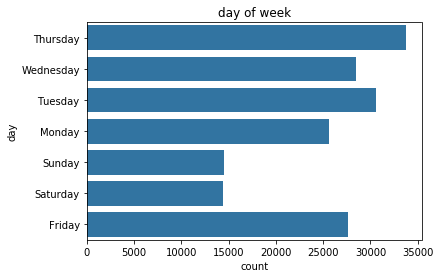

In [19]:
start_time_day_of_week = df['start_time'].dt.day_name()
sb.countplot(y = start_time_day_of_week, color = base_color)
plt.title('day of week');
plt.ylabel ('day');

> Sunday and Satuday have the least rent count as these are the holidays.

### Which station has the most rented bikes?

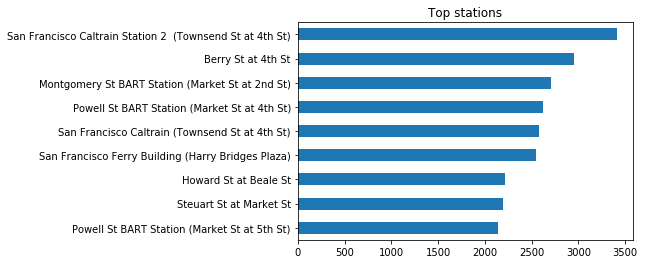

In [20]:
df['start_station_name'].value_counts()[1:10].sort_values(ascending=True).plot(kind='barh',sort_columns=True)
plt.title('Top stations');

### Duration

In [21]:
df['duration_min'] = df['duration_sec'] / 60

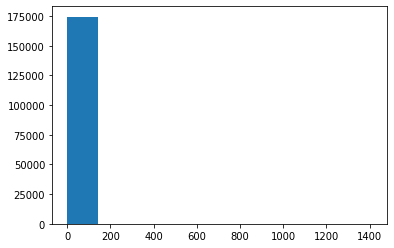

In [22]:
plt.hist(df['duration_min']);

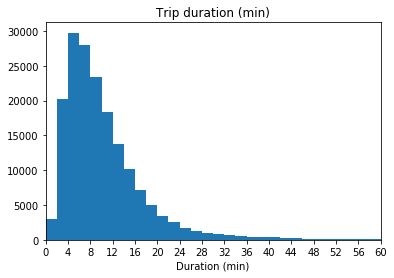

In [23]:
plt.hist(data = df, x = 'duration_min', bins = np.arange(0, 60+2,2));
plt.xticks(np.arange(0, 60+4 ,4));
plt.xlim(0,60)
plt.title("Trip duration (min)");
plt.xlabel('Duration (min)');

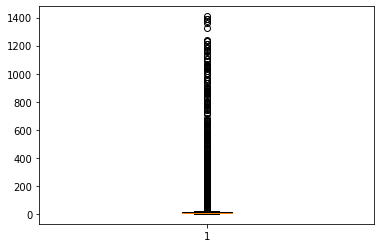

In [24]:
plt.boxplot(df['duration_min']);

> the duration distribution is right skewed with so many outliers <br>


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> yes, regarding the age distribution there were outliers and unusual points.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> yes, the day of month distribution there was a pattern in the figure, it was like 3 or 4 consecutive days have high rate then 2 or 3 days have low rate, so I investigated the days of weeks and found out that Saturday and Sunday have low rate and the other days have higher rate.

## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables in our
data.

### Is there a ralation between age and member_gender?

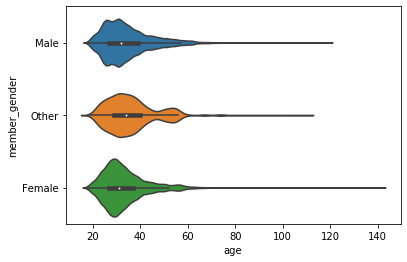

In [25]:
sb.violinplot(data = df, x = 'age', y = 'member_gender');

> Female's age is more than males.

### Relation between user type and gender

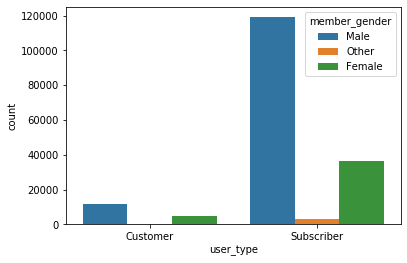

In [26]:
sb.countplot(data = df, x = 'user_type', hue = 'member_gender');

> men tend to be subscriber than women

### Relation between day of week and Duration

In [27]:
df['day_of_week'] = df['start_time'].dt.day_name()


In [28]:
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['day_of_week'] = df['day_of_week'].astype(cat_type)


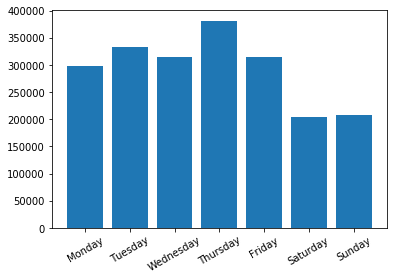

In [29]:
result = df.groupby('day_of_week')['duration_min'].sum()
plt.bar(x = result.index , height = result.values ,color = base_color);
plt.xticks(rotation=30);

> the duration on Saturday and Sunday is lower than other days

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The duration varies with the day of the week

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Female's age is more than males. <br>
> men tend to be subscriber than women

## Multivariate Exploration


### Relation between Days of the week, top stations and user type

In [30]:
top5 = df.groupby('start_station_name')['duration_min'].sum().sort_values(ascending=False)[0:5]
top5 = list(top5.index)
dftop5 = df.query("start_station_name == @top5")

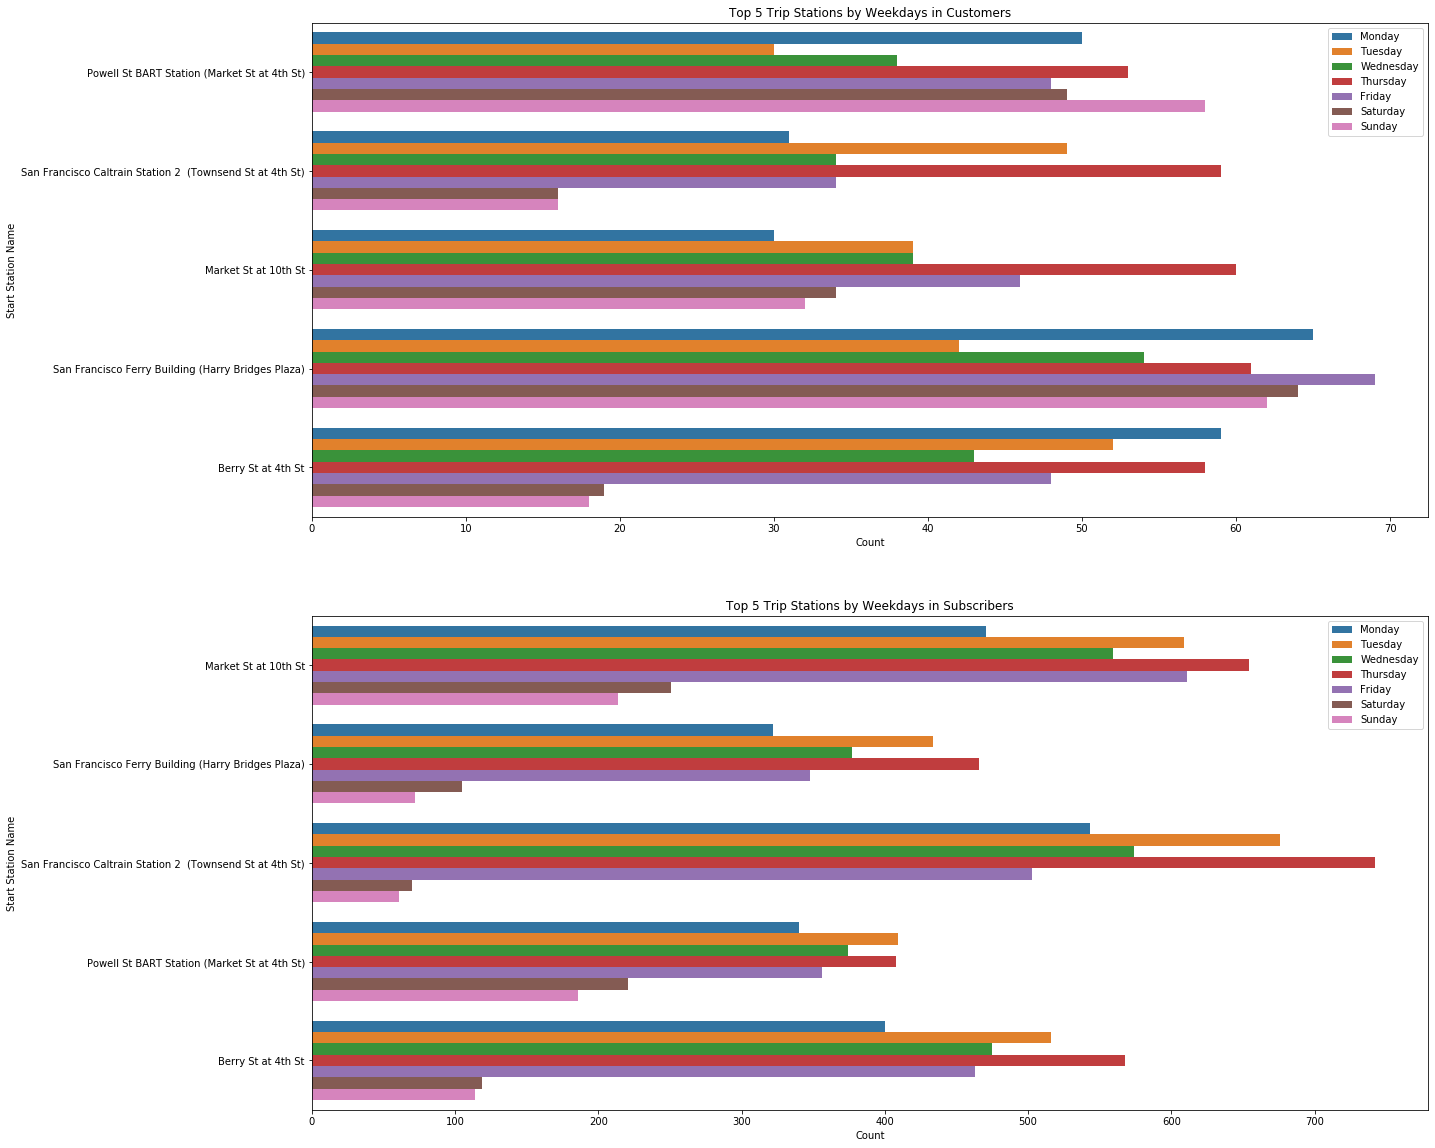

In [31]:
plt.figure(figsize=(20,20))
ax = plt.subplot(2,1,1)
sb.countplot(data=dftop5[dftop5['user_type'] == 'Customer'], y='start_station_name', hue='day_of_week')
plt.legend()
plt.title('Top 5 Trip Stations by Weekdays in Customers')
plt.ylabel('Start Station Name')
plt.xlabel('Count')

ax = plt.subplot(2,1,2)
sb.countplot(data=dftop5[dftop5['user_type'] == 'Subscriber'], y='start_station_name', hue='day_of_week')
plt.legend()
plt.title('Top 5 Trip Stations by Weekdays in Subscribers')
plt.ylabel('Start Station Name')
plt.xlabel('Count');



### Relation between Duration of the week, top stations and user type

In [32]:
correlation = pd.DataFrame(df, columns = ['duration_min', 'start_station_longitude', 'end_station_longitude'])

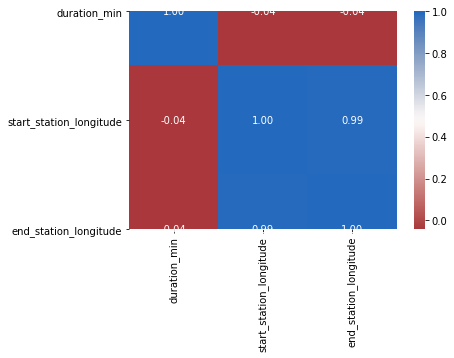

In [33]:
sb.heatmap(correlation.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r',);

> there is a strong correlation between start_station_longitude and end_station_longitude

### The affection of  user type on duration per week day  

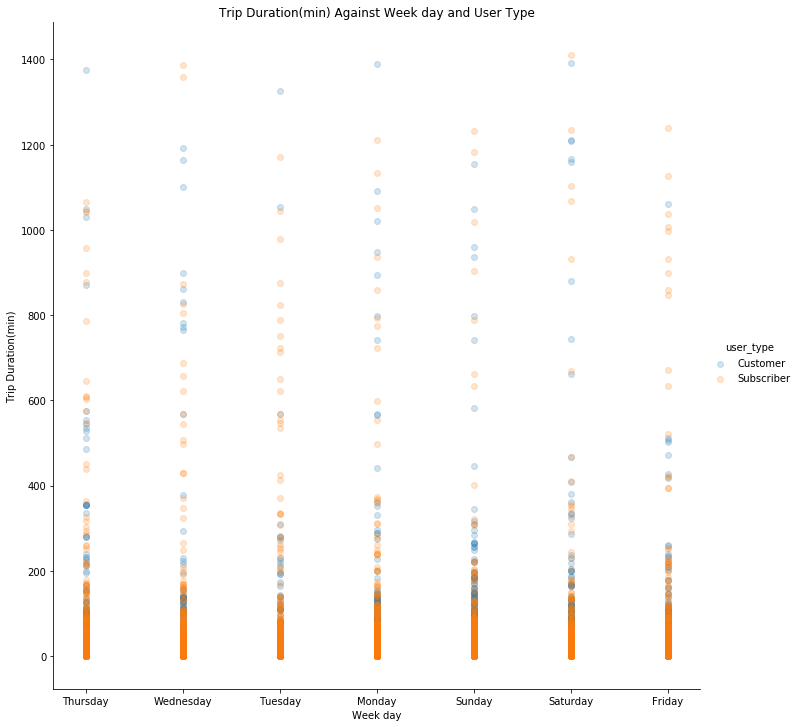

In [34]:
g = sb.FacetGrid(data = df, hue = 'user_type', height = 10)
g.map(plt.scatter, 'day_of_week','duration_min', alpha = 0.2)
g.add_legend()
plt.title('Trip Duration(min) Against Week day and User Type')
plt.xlabel('Week day')
plt.ylabel('Trip Duration(min)');

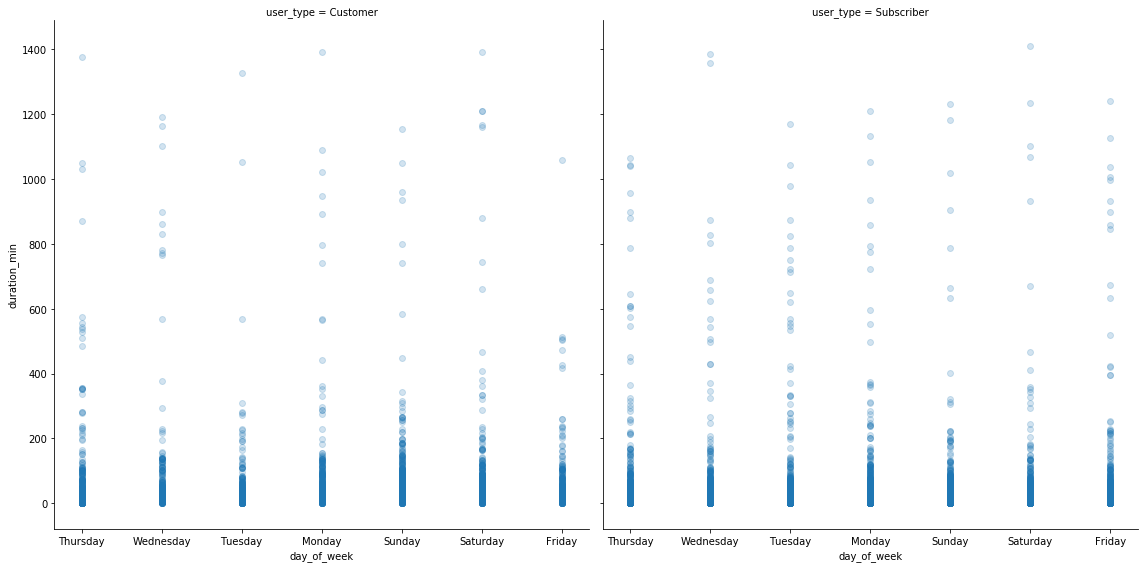

In [36]:
user_type_plot = sb.FacetGrid(data =  df, col = 'user_type', size = 8, col_wrap = 2)
user_type_plot.map(sb.regplot, 'day_of_week', 'duration_min', y_jitter = 0.04, fit_reg = False,scatter_kws = {'alpha' : 1/5});


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> there is agood correlation between start longitude and end longitude

### Were there any interesting or surprising interactions between features?

> customers make longer trips than subscribers